<a href="https://colab.research.google.com/github/francji1/01RAD/blob/main/code/01RAD_Ex05_student_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01RAD Exercise 05

### Individual Student Work- HW

1. **Data Exploration and Preprocessing**  
   - Load the same `mpg` dataset, keep only relevant variables, and set `weight` as the response variable.  
   - Add a new categorical variable based on the `origin` column (e.g., convert it to a categorical variable with three levels: `USA`, `Europe`, `Japan`).  
   - Examine the relationship (plot everything important) between `weight` and each predictor variable, including the new categorical variable.

2. **Initial Model Fitting**  
   - Fit an OLS model with `weight` as the response variable and `horsepower`, `displacement`, and `acceleration` as predictors.  
   - Include the categorical variable `origin` as an additional predictor in the model.  
   - Examine the summary output, focusing on the coefficients and the p-values for each predictor.

3. **Evaluate Model with Overall F-Test and Individual t-Tests**  
   - Compute the overall F-test to determine if at least one predictor significantly explains the variance in `weight`.  
   - Compare the F-test result with individual t-tests of each predictor.  
   - Interpret the p-values and discuss the differences between F-test and individual t-tests.
   - Compare $R^2$ with adjusted $R^2$ and explain the difference.

4. **Investigate Correlation**
    - Find in the model two variables with highest correlation and remove one of them from the model.
    - Comapare the new lighter model with the previous full model.
    - Fix common independent variables on the same values (try 3 different setting), choose the value of the removed randomly and comapre the prediction intervals of both models.   

5. **Impact of Categorical Variable on Model**  
    - Fit a model with interaction terms between `origin` and `horsepower` or `displacement` to explore if the effect of these predictors differs by region.  
    - Interpret the interaction terms and examine how the inclusion of the categorical variable changes the model fit and interpretation.

6. **Model Selection with Stepwise Regression**  
   - Implement stepwise regression (either backward or forward) based on p-values to select a subset of predictors.  
   - Compare the final model with the initial model in terms of adjusted \( R^2 \) and AIC values.  

7. **Diagnostic Plots for Residual Analysis**  
   - Create diagnostic plots to assess model assumptions:  
      - Residuals vs. fitted values plot  
      - Q-Q plot for normality of residuals  
      - Histogram of residuals  




In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.utils import resample

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from scipy import stats
from scipy.stats import pearsonr, spearmanr, f, t

import seaborn as sns
import matplotlib.pyplot as plt


data = sns.load_dataset('mpg').dropna()  # Load and clean dataset
del data['name'] #drop the 'name' column
data['origin'] = data['origin'].astype('category') #set origin as categorical variable


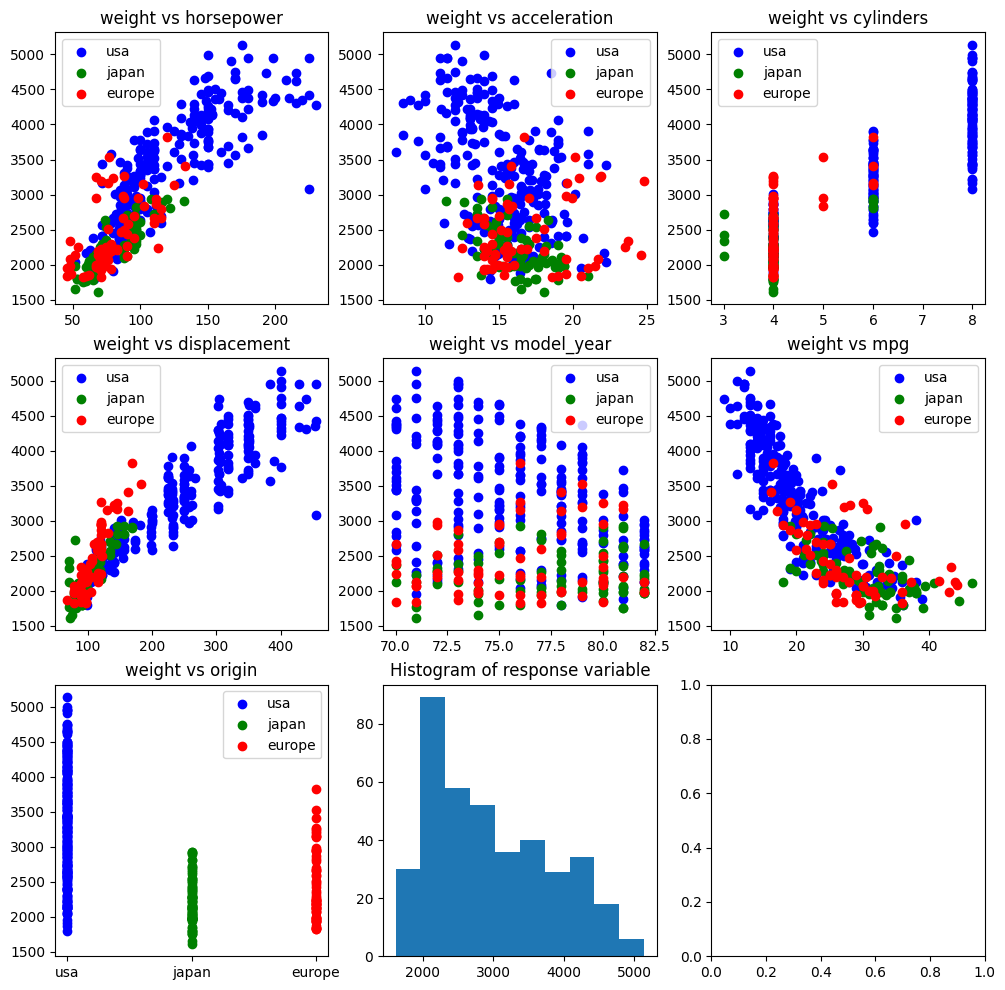

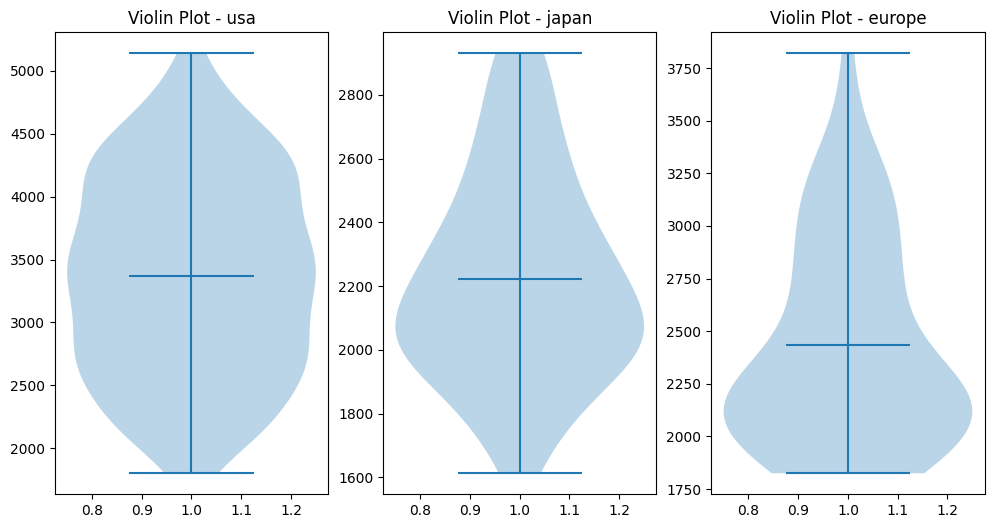

In [2]:
# scatterplots
predictor_variables = {'mpg', 'cylinders', 'displacement', 'horsepower', 'acceleration', 'model_year', 'origin'}

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

axes_flat = axes.flatten()
categories = data['origin'].unique()
colors = ['blue', 'green', 'red']


for i,variable in enumerate(predictor_variables):
    ax = axes_flat[i]
    for j,category in enumerate(categories):
      subset = data[data['origin'] == category]
      ax.scatter(subset[variable], subset['weight'], label = category, color=colors[j])
      ax.set_title(f'weight vs {variable}')
      ax.legend()

axes_flat[7].hist(data['weight'])
axes_flat[7].set_title('Histogram of response variable')

# Create the violin plot
gif, axs = plt.subplots(1, 3, figsize=(12, 6))

for i,category in enumerate(categories):
  subset = data[data['origin'] == category]
  axs[i].violinplot(subset['weight'], showmeans=True, showmedians=False)
  axs[i].set_title(f'Violin Plot - {category}')

# Show the plot
plt.show()


In [3]:
model_1 = smf.ols(formula='weight ~ horsepower + displacement + acceleration', data=data).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     1201.
Date:                Mon, 11 Nov 2024   Prob (F-statistic):          6.49e-196
Time:                        21:08:19   Log-Likelihood:                -2742.8
No. Observations:                 392   AIC:                             5494.
Df Residuals:                     388   BIC:                             5509.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -190.0514    153.469     -1.238   

**intercept** **coefficient** = -190.05, i. e. the average weight of an automobile with 0    horsepower, 0 displacement and 0 acceleration is -190 units

**horsepower** = 8.55 i. e. an increase of horsepower by one unit will, ceteris paribus, increase the expected weight by 8.55 units

**displacement** = 5.80 i. e. an increase of horsepower by one unit will, ceteris paribus, increase the expected weight by 5.80 units

**acceleration** = 73.68 i. e. an increase of acceleration by one unit will, ceteris paribus, increase the expected weight by 73.68 units

**regarding p-values**: all regressors are strongly significant, the intercept value is, however, insignificant due to high standard error

In [4]:
model_2 = smf.ols(formula = 'weight ~ horsepower + displacement + acceleration + origin', data = data).fit()
print(model_2.summary())



                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     732.8
Date:                Mon, 11 Nov 2024   Prob (F-statistic):          1.64e-194
Time:                        21:08:20   Log-Likelihood:                -2738.9
No. Observations:                 392   AIC:                             5490.
Df Residuals:                     386   BIC:                             5514.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -91.8034    157.212     

**intercept** **coefficient** = -190.05, i. e. the average weight of an auropean automobile with 0 horsepower, 0 displacement and 0 acceleration is -190 units, the p-value equal to 0.002 suggests that the intercept is statistically significant

**japan** = 1258 i. e. a japanese automobile with 0 horsepower, 0 displacement and 0 acceleration is on average heavier by 1258 units than the corresponding european automobile, p-value = 0.024 - statistically significant on 5% confidence level

**usa** = 678 i. e. an american automobile with 0 horsepower, 0 displacement and 0 acceleration is on average heavier by 1258 units than the corresponding european automobile, p-value = 0.051 - on the border of statistical significance on 5% confidence level

**horsepower** = 11.13 i. e. an increase of horsepower by one unit will, ceteris paribus, increase the expected weight of an european automobile by 11.13 units, p-value 0.000 - statistically significant

**displacement** = 12,84 i. e. an increase of displacement by one unit will, ceteris paribus, increase the expected weight of an european automobile by 12.84 units, p-value 0.000 - statistically significant

In [5]:
#manual computation of F-test

y_hat = model_2.fittedvalues

m = 5 #number of regressors

SSR = ((y_hat - y_hat.mean())**2).sum()

s_n2 = 1/(len(data['weight'])-m-1)*((y_hat - data['weight'])**2).sum()

F = SSR/(5*s_n2)

quantile = f.ppf(0.95, 5,m, len(data['weight'])-m-1)

print(f'the value of the F-statistic is {round(F,2)}, whereas the 95th quantile of Fisher distribution is {round(quantile,2)}')



the value of the F-statistic is 732.81, whereas the 95th quantile of Fisher distribution is 391.05


the result of the test is that at least one of the regressors is significant

results of individual t-tests in terms of p-values:

japan: 0.006

usa: 0.262

horsepower: 0.000

acceleration: 0.000

displacement: 0.000

the t-test suggest that japan, horsepower, acceleration and displacement are significant while usa is insignificant

The F-test serves for assessing a following null hypothesis: all regressors are insignificant

individual t-test serves for assessing a following null hypothesis: the given regressor is insignificant

R^2 = SSR/SST - it can be shown that R^2 is non-decreasing in terms of adding regressors

Adjusted R^2 = 1 - (1-R^2)(n-1)/(n-k-1) i. e. the adjusted R^2 penalizes more complex models  

In [6]:
data_encoded = pd.get_dummies(data[['displacement', 'horsepower', 'acceleration', 'origin']], columns = ['origin'], drop_first=True)

correlation_matrix = data_encoded.corr()
print(correlation_matrix)

              displacement  horsepower  acceleration  origin_japan  origin_usa
displacement      1.000000    0.897257     -0.543800     -0.440825    0.655936
horsepower        0.897257    1.000000     -0.689196     -0.321936    0.489625
acceleration     -0.543800   -0.689196      1.000000      0.115020   -0.258224
origin_japan     -0.440825   -0.321936      0.115020      1.000000   -0.648583
origin_usa        0.655936    0.489625     -0.258224     -0.648583    1.000000


One can see that displacement and horsepower are highly correlated with 0.897 so let's remove displacement from the model

In [7]:
model_3 = smf.ols(formula = 'weight ~ horsepower + acceleration + origin', data = data).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     512.7
Date:                Mon, 11 Nov 2024   Prob (F-statistic):          3.57e-153
Time:                        21:08:20   Log-Likelihood:                -2838.9
No. Observations:                 392   AIC:                             5688.
Df Residuals:                     387   BIC:                             5708.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -867.9649    192.786     

In [8]:
print('Comparison of full and lighter model')

print('Full model descriptive statistics')
print(f'joint significance test p-value: {model_2.f_pvalue}')
print(f'adjusted R^2: {model_2.rsquared_adj}')
print('estimated parameters of the full model:')
print(model_2.params)
print('individual t-test p-values:')
print(model_2.pvalues)
print(' ')

print('Lighter model descriptive statistics')
print(f'joint significance test p-value: {model_3.f_pvalue}')
print(f'adjusted R^2: {model_3.rsquared_adj}')
print('estimated parameters of the lighter model:')
print(model_3.params)
print('individual t-test p-values:')
print(model_3.pvalues)

Comparison of full and lighter model
Full model descriptive statistics
joint significance test p-value: 1.6428584391575042e-194
adjusted R^2: 0.9034578725372944
estimated parameters of the full model:
Intercept          -91.803361
origin[T.japan]   -121.748365
origin[T.usa]      -49.878718
horsepower           8.582438
displacement         5.716730
acceleration        71.878998
dtype: float64
individual t-test p-values:
Intercept          5.595984e-01
origin[T.japan]    5.817403e-03
origin[T.usa]      2.616785e-01
horsepower         2.812870e-17
displacement       1.096259e-44
acceleration       1.427054e-22
dtype: float64
 
Lighter model descriptive statistics
joint significance test p-value: 3.56588227570606e-153
adjusted R^2: 0.8396095673653219
estimated parameters of the lighter model:
Intercept         -867.964869
origin[T.japan]   -138.571916
origin[T.usa]      279.954600
horsepower          21.502187
acceleration        93.440132
dtype: float64
individual t-test p-values:
Interc

In [9]:
#let us determine the prediction intervals for chosen points
import random

random.seed(23)

x = random.randint(0,len(data)-1)

y = random.randint(0,len(data)-1)

z = random.randint(0,len(data)-1)

selected_observations = {x, y, z}

#regressor matrix for full model
full_X = data_encoded[['horsepower', 'acceleration','displacement', 'origin_japan', 'origin_usa']]
full_X = sm.add_constant(full_X) #to include intercept in the smf model

#convert boolean to 0/1 variable
full_X['origin_japan'] = full_X['origin_japan'].astype('float')
full_X['origin_usa'] = full_X['origin_usa'].astype('float')

#regressor matrix for lighter model
light_X = full_X.drop('displacement', axis = 1)

for observation in selected_observations:
  f_model_wo = sm.OLS(data['weight'].drop(observation), full_X.drop(observation)).fit() #full model without fixed point
  #print(f_model_wo.summary())
  X_f = f_model_wo.model.exog #extract the regressor matrix from the regression
  XtXinv_f = np.linalg.inv(np.dot(X_f.T, X_f)) #calulace the inverse of (X^TX) needed for determination of prediction interval
  sn_2_f = 1/(f_model_wo.df_resid)*((f_model_wo.fittedvalues - np.delete(data['weight'],observation))**2).sum() #SE estimator
  y_pred_f = f_model_wo.predict(full_X.iloc[observation]).iloc[0] #prediction of y
  t_f = t.ppf(0.975, f_model_wo.df_resid)
  upper_b_f = y_pred_f + t_f*np.sqrt(sn_2_f*np.dot(full_X.iloc[observation],np.dot(XtXinv_f,full_X.iloc[observation])))
  lower_b_f = y_pred_f - t_f*np.sqrt(sn_2_f*np.dot(full_X.iloc[observation],np.dot(XtXinv_f,full_X.iloc[observation])))
  print(f'The prediction interval for {observation+1}th observation in full model is [{round(lower_b_f,2)},{round(upper_b_f,2)}], width = {round(upper_b_f - lower_b_f,0)} .The fitted value is {y_pred_f}')

  l_model_wo = sm.OLS(data['weight'].drop(observation), light_X.drop(observation)).fit() #lighter model without fixed point
  #print(l_model_wo.summary())
  X_l = l_model_wo.model.exog #extract the regressor matrix from the regression
  XtXinv_l = np.linalg.inv(np.dot(X_l.T, X_l)) #calulate the inverse of (X^TX) needed for determination of prediction interval
  sn_2_l = 1/(l_model_wo.df_resid)*((l_model_wo.fittedvalues - np.delete(data['weight'],observation))**2).sum() #SE estimator
  y_pred_l = l_model_wo.predict(light_X.iloc[observation]).iloc[0] #prediction of y
  t_l = t.ppf(0.975, l_model_wo.df_resid)
  upper_b_l = y_pred_l + t_l*np.sqrt(sn_2_l*np.dot(light_X.iloc[observation],np.dot(XtXinv_l,light_X.iloc[observation])))
  lower_b_l = y_pred_l - t_l*np.sqrt(sn_2_l*np.dot(light_X.iloc[observation],np.dot(XtXinv_l,light_X.iloc[observation])))
  print(f'The prediction interval for {observation+1}th observation in lighter model is [{round(lower_b_l,2)},{round(upper_b_l,2)}], width = {round(upper_b_l - lower_b_l,0)}. The fitted value is {y_pred_l}')




The prediction interval for 9th observation in full model is [5039.76,5221.33], width = 182.0 .The fitted value is 5130.541632807605
The prediction interval for 9th observation in lighter model is [5091.08,5324.4], width = 233.0. The fitted value is 5207.737199601383
The prediction interval for 43th observation in full model is [4397.57,4522.39], width = 125.0 .The fitted value is 4459.979521918994
The prediction interval for 43th observation in lighter model is [4114.44,4249.3], width = 135.0. The fitted value is 4181.871314651945
The prediction interval for 149th observation in full model is [2254.82,2377.55], width = 123.0 .The fitted value is 2316.1816018914947
The prediction interval for 149th observation in lighter model is [2365.01,2518.06], width = 153.0. The fitted value is 2441.532173247299


In [10]:
model_4 = smf.ols(formula = 'weight ~ horsepower + displacement + acceleration + origin + horsepower*origin', data = data).fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     632.6
Date:                Mon, 11 Nov 2024   Prob (F-statistic):          1.93e-206
Time:                        21:08:20   Log-Likelihood:                -2704.0
No. Observations:                 392   AIC:                             5424.
Df Residuals:                     384   BIC:                             5456.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           


**horsepowerXjapan** = -1.36 i. e. partiall effect of horsepower on weight is lower by 1.3 units for a japanese automobile than for a european automobile, p-value = 0.522 - statistically insignificant

**horsepowerXusa** = -11.35 i. e. partiall effect of horsepower on weight is lower by 1.3 units for an american automobile than for a european automobile, p-value = 0.000 - statistically significant

adjusted R^2 is higher than the one of the model without interaction, so the model with interaction describes a bigger amount of variability in data






In [11]:
#backward stepwise selection of regressors based on p-values:

 #initialize the predictor matrix
X = data.drop(['weight'], axis = 1)
selected_features = X.columns.tolist()
X = sm.add_constant(X)
X_encoded = pd.get_dummies(X, columns = ['origin'], drop_first= True)
selected_features = X_encoded.columns.tolist()
X_encoded[['origin_japan', 'origin_usa']] = X_encoded[['origin_japan', 'origin_usa']].astype('float')

def stepwise_selection(threshold_out=0.10):

    while True:
        # Fit model with current selected regressors
        model = sm.OLS(np.asarray(data['weight']),X_encoded[selected_features]).fit()
        # Get the p-values for each feature
        p_values = model.pvalues

        # Find the largest p-value among the regressors
        max_p_value = p_values.max()

        # If the largest p-value is greater than the threshold for removal, remove the regressor
        if max_p_value > threshold_out:
            feature_to_remove = p_values.idxmax()
            selected_features.remove(feature_to_remove)
            print(f"Removed: {feature_to_remove} with p-value: {max_p_value}")
        else:
            break  # Stop when no feature has a p-value greater than the threshold

    return selected_features

selected_model = sm.OLS(data['weight'],X_encoded[stepwise_selection()]).fit()
print(selected_model.summary())

Removed: cylinders with p-value: 0.13769577987878887
                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     714.6
Date:                Mon, 11 Nov 2024   Prob (F-statistic):          7.94e-216
Time:                        21:08:20   Log-Likelihood:                -2681.9
No. Observations:                 392   AIC:                             5380.
Df Residuals:                     384   BIC:                             5412.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

Comparison of the optimal model gained by stepwise selection and the initial one:

adjusted R^2:         optimal = 0.927               initial = 0.902

Akaike criterion:     optimal = 5380                initial = 5494

in both terms, the optimal model gained by stepwise selection is better than the initial one

(array([  1.,   0.,   0.,   0.,   5.,  38., 156., 146.,  42.,   4.]),
 array([-1721.81609779, -1474.61010751, -1227.40411724,  -980.19812697,
         -732.9921367 ,  -485.78614643,  -238.58015616,     8.62583411,
          255.83182438,   503.03781465,   750.24380492]),
 <BarContainer object of 10 artists>)

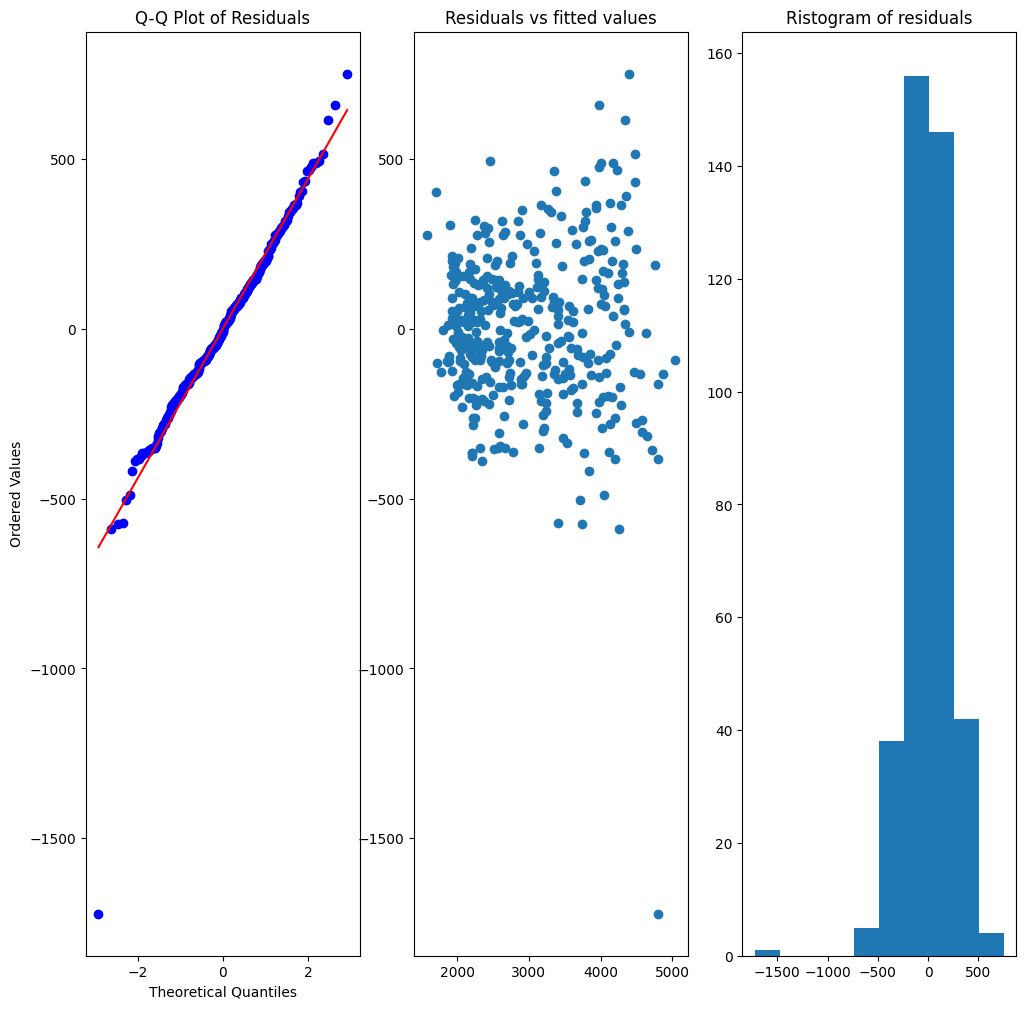

In [12]:
fig, axes = plt.subplots(1,3, figsize = (12,12) )

#QQ plot
stats.probplot(selected_model.resid, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q Plot of Residuals")
axes[0].set_ylabel("Ordered Values")
axes[0].set_xlabel("Theoretical Quantiles")

#residuals vs fitted values
axes[1].scatter(selected_model.fittedvalues, selected_model.resid)
axes[1].set_title("Residuals vs fitted values")

#histogram of residuals
axes[2].set_title("Ristogram of residuals")
plt.hist(selected_model.resid)




According to the diagnostical visualizations, there is an outlier in the residuals, so an observation with very high difference between the true and fitted value. One can not simply determine what causes this discrepancy and thus it is not necessarily good to remove this observation from modelling. But it would be at least interesting to see how the model changes

In [13]:
#find the outlier observation
outlier_no = selected_model.resid.idxmin()

#fit the selected model without the outlier
selected_model_2 = sm.OLS(data['weight'].drop(outlier_no),X_encoded[stepwise_selection()].drop(outlier_no)).fit()
print(selected_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     852.7
Date:                Mon, 11 Nov 2024   Prob (F-statistic):          3.55e-229
Time:                        21:08:21   Log-Likelihood:                -2642.8
No. Observations:                 391   AIC:                             5302.
Df Residuals:                     383   BIC:                             5333.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1549.5391    283.844     -5.459   

(array([ 5., 12., 31., 85., 98., 90., 40., 20.,  8.,  2.]),
 array([-617.96137818, -485.019937  , -352.07849582, -219.13705465,
         -86.19561347,   46.74582771,  179.68726888,  312.62871006,
         445.57015124,  578.51159242,  711.45303359]),
 <BarContainer object of 10 artists>)

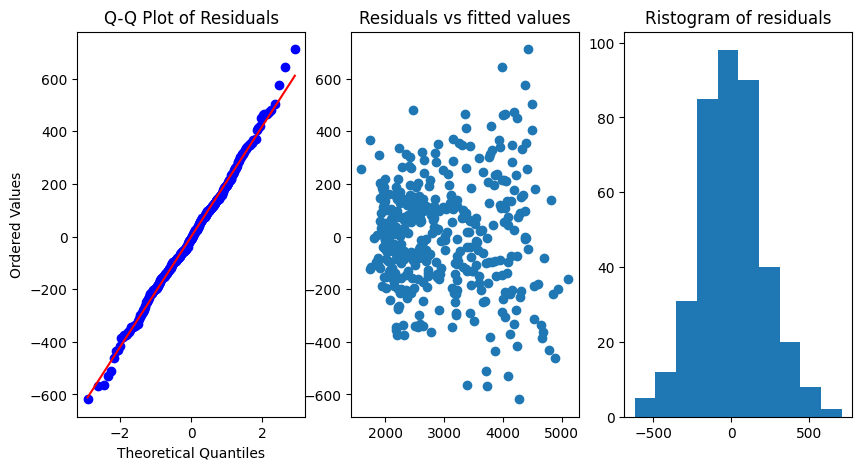

In [14]:
#diagnostics of the model without outlier:

fig, axes = plt.subplots(1,3, figsize = (10,5) )

#QQ plot
stats.probplot(selected_model_2.resid, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q Plot of Residuals")
axes[0].set_ylabel("Ordered Values")
axes[0].set_xlabel("Theoretical Quantiles")

#residuals vs fitted values
axes[1].scatter(selected_model_2.fittedvalues, selected_model_2.resid)
axes[1].set_title("Residuals vs fitted values")

#histogram of residuals
axes[2].set_title("Ristogram of residuals")
plt.hist(selected_model_2.resid)

